# Is Form Substance? A sentiment analysis of ECB monetary policy.
A Research proposal compiled by Matteo Almici, Pierpaolo Fiore, Andrea Pavese, Antonio Valentinov Puzalkov.  
This code serves as the basis for the empirical research conducted.


## Import the required dependencies


In [95]:
import pandas as pd
from tqdm.notebook import tqdm
import os
import nltk
from nltk.tokenize import word_tokenize



In [96]:
nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-t

True

#### Import the Data we need:
in the following section of our notebook we will introduce the Data  from the ECB up until 2023

In [97]:
main_ds = pd.read_csv("Inputs//all_ECB_speeches.csv", sep="|") #if the file has to be changed, be careful with the sep option.
main_ds.head()

,date,speakers,title,subtitle,contents
0,2023-10-30,Luis de Guindos,The euro area economy and our monetary policy ...,"Remarks by Luis de Guindos, Vice-President of ...",SPEECH The euro area economy and our moneta...
1,2023-10-25,Christine Lagarde,Remarks delivered at the Bank of Greece on the...,"Speech by Christine Lagarde, President of the ...",SPEECH Remarks delivered at the Bank of G...
2,2023-10-17,Luis de Guindos,Macroprudential policy and research: learning ...,"Dinner speech by Luis de Guindos, Vice-Preside...",SPEECH Macroprudential policy and researc...
3,2023-10-14,Christine Lagarde,IMFC Statement,"Statement by Christine Lagarde, President of t...",SPEECH IMFC Statement Statement by Christ...
4,2023-10-04,Luis de Guindos,The inflation outlook and monetary policy in t...,"Keynote speech by Luis de Guindos, Vice-Presid...",SPEECH The inflation outlook and monetary p...


## Preprocessing

In [98]:
# we need to combine the speeches uniting title, subtitle and contents

main_ds["speech_merged"] = main_ds["title"] + "\n" + main_ds["subtitle"] + "\n" + main_ds["contents"]
main_ds = main_ds.drop(columns=["title", "subtitle", "contents"])
        

In [99]:

from tqdm import tqdm


def preprocessing_df(ds_input):
    """ We define a function which preprocesses the dataframe containg the speeches

    Args:
        ds_input (Dataframe): Contains the speeches ordered by date of the ECB governors.

    Returns:
        ds_input (Dataframe): preprocessed speeches
    """
    stopwords = nltk.corpus.stopwords.words("english")
    
    # Define a preprocessing routine
    def preprocess_text(speech):
        tokens = word_tokenize(speech)
        tokens = [w.lower() for w in tokens if w.isalpha() or w.isdigit() and w.lower() not in stopwords]
        return ' '.join(tokens)

    # Use tqdm with apply to display a progress bar
    tqdm.pandas(desc="Processing rows")
    ds_input['speech_merged'] = ds_input['speech_merged'].astype(str).progress_apply(preprocess_text)

    return ds_input

# Apply this function to your DataFrame
# ds_prep = preprocessing_df(your_dataframe)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
ds_prep = preprocessing_df(main_ds)
ds_prep.to_excel("Outputs//Intermediate//prep_new.xlsx", index=False)


Processing rows:   0%|          | 0/2736 [00:00<?, ?it/s]

Processing rows: 100%|██████████| 2736/2736 [00:55<00:00, 49.65it/s]


In [101]:
import pandas as pd
from tqdm.notebook import tqdm
import os
import nltk
from nltk.tokenize import word_tokenize
import numpy as np


## Analysis of the Sentiment
Here below, after having done the preprocessing of our file, we use the VADER algorithm to establish the sentiment score of each speech:

In [102]:
ds_prep = pd.read_excel("Outputs//Intermediate//prep_new.xlsx")

In [103]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
scores = []
for sentence in tqdm(ds_prep["speech_merged"]):
    score = sia.polarity_scores(str(sentence))
    scores.append(score)
neg_scores = [score['neg'] for score in scores]
neu_scores = [score['neu'] for score in scores]
pos_scores = [score['pos'] for score in scores]
compound_scores = [score['compound'] for score in scores]

ds_prep['neg_score'] = neg_scores
ds_prep['neu_score'] = neu_scores
ds_prep['pos_score'] = pos_scores
ds_prep['compound_score'] = compound_scores

  0%|          | 0/2736 [00:00<?, ?it/s]

(array([  1.,   0.,   1.,   1.,   3.,   5.,   6.,   2.,   5.,   6.,   2.,
         11.,   5.,   5.,   5.,   6.,   7.,   3.,   2.,   4.,   0.,   2.,
          2.,   1.,   0.,   1.,   1.,   0.,   3.,   0.,   0.,   0.,   0.,
          0.,   2.,   2.,   0.,   3.,   5.,   6.,   9.,   9.,   9.,  14.,
          8.,  21.,  23.,  28., 121.,  35.,  47.,  43.,  62.,  42.,  44.,
         77.,  65.,  73.,  93.,  99., 112., 108.,  97., 103.,  99., 111.,
        101., 109.,  98., 109.,  81.,  73.,  76.,  64.,  56.,  53.,  51.,
         49.,  16.,  31.,  18.,  19.,  16.,  14.,  12.,   7.,   9.,   4.,
          4.,   1.,   2.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.21319687, -0.20881531, -0.20443375, -0.2000522 , -0.19567064,
        -0.19128908, -0.18690753, -0.18252597, -0.17814441, -0.17376286,
        -0.1693813 , -0.16499974, -0.16061819, -0.15623663, -0.15185507,
        -0.14747352, -0.14309196, -0.1387104 , -0.13432885, -0.12994729,
        -0.12556573, -0.12

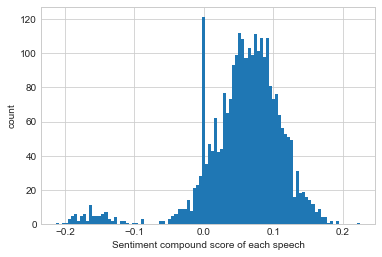

In [104]:
import numpy as np
import matplotlib.pyplot as plt
ds_prep['tanh_normalized_compound'] = np.tanh(ds_prep['pos_score']-ds_prep["neg_score"])

data = np.tanh(ds_prep['tanh_normalized_compound'])
fig = plt.figure() ; ax = plt.axes( xlabel= "Sentiment compound score of each speech", ylabel= "count")
ax.hist(data, bins=100)

In [105]:
ds_prep.to_excel("Outputs//Intermediate//sentiment.xlsx")

## Econometric Analysis

In [10]:
import pandas as pd
from tqdm.notebook import tqdm
import os
import nltk
from nltk.tokenize import word_tokenize
import numpy as np


In [73]:
ds_prep = pd.read_excel("Outputs//Intermediate//sentiment.xlsx")

## Descriptive Analysis

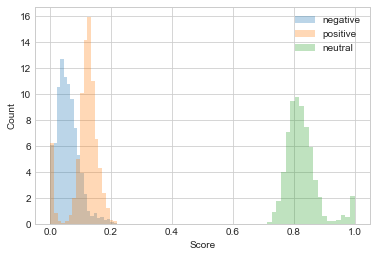

In [81]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")
fig = plt.figure()
ax = plt.axes(xlabel="Score", ylabel="Count")

x1 = ds_prep["neg_score"]
x2 = ds_prep["pos_score"]
x3 = ds_prep["neu_score"]

kwargs = dict(histtype="stepfilled", alpha=0.3, density=True, bins=20)
ax.hist(x1, label="negative", **kwargs)
ax.hist(x2,label="positive", **kwargs)
ax.hist(x3,label="neutral", **kwargs)

plt.legend()
plt.show()


## Timeseries of our Compound Score

In [108]:
import numpy as np

ds_prep['date'] = pd.to_datetime(ds_prep['date'])

ds_prep['year_month'] = ds_prep['date'].dt.to_period('M')

# Apply tanh function to the 'compound_score' column
# It seems the 'tanh_normalized_compound' column might already be the tanh of compound_score,
# but we will compute it again to be sure

# Group by year and month, and calculate the average of the tanh compound score
monthly_avg_tanh_compound = ds_prep.groupby('year_month')['tanh_normalized_compound'].mean().reset_index()

monthly_avg_tanh_compound.head()

,year_month,tanh_normalized_compound
0,1997-02,0.058932
1,1997-03,0.044970
2,1997-04,0.068392
3,1997-05,0.063913
4,1997-06,0.092728


## Include other variables

In [109]:
ds2 = pd.read_excel("Inputs\INFYOY 1990-2023.xlsx")
ds2['Date'] = pd.to_datetime(ds2['Date'])
ds2['year_month'] = ds2['Date'].dt.to_period('M')
ds2.drop(columns="Date")


,M3_YOY_MON,HICP_YOY_MON,Interbank3,M1_YOY_MON,year_month
0,3.8,1.8,4.430000,-3.654,1997-02
1,3.6,1.6,4.500000,-2.444,1997-03
2,3.5,1.3,4.390000,-4.117,1997-04
3,4.0,1.4,4.300000,-2.415,1997-05
4,4.4,1.4,4.290000,-3.739,1997-06
...,...,...,...,...,...
317,-0.4,5.3,3.671810,-2.375,2023-07
318,-1.3,5.2,3.780304,-3.440,2023-08
319,-1.2,4.3,3.880048,-2.851,2023-09
320,NaN,2.9,3.967636,NaN,2023-10


In [110]:
merged = pd.merge(ds2,monthly_avg_tanh_compound, on='year_month', how='outer')
merged.drop(columns='Date') 

,M3_YOY_MON,HICP_YOY_MON,Interbank3,M1_YOY_MON,year_month,tanh_normalized_compound
0,3.8,1.8,4.430000,-3.654,1997-02,0.058932
1,3.6,1.6,4.500000,-2.444,1997-03,0.044970
2,3.5,1.3,4.390000,-4.117,1997-04,0.068392
3,4.0,1.4,4.300000,-2.415,1997-05,0.063913
4,4.4,1.4,4.290000,-3.739,1997-06,0.092728
...,...,...,...,...,...,...
317,-0.4,5.3,3.671810,-2.375,2023-07,0.061241
318,-1.3,5.2,3.780304,-3.440,2023-08,0.011663
319,-1.2,4.3,3.880048,-2.851,2023-09,0.034852
320,NaN,2.9,3.967636,NaN,2023-10,0.055033


## Attempt of a VAR:

In [ ]:
merged.to_excel("Outputs//Intermediate//merged.xlsx")

In [113]:

from statsmodels.tsa.api import VAR
import statsmodels.api as sm
import pandas as pd
from tqdm.notebook import tqdm
import os
import nltk
from nltk.tokenize import word_tokenize
import numpy as np

merged = pd.read_excel("Outputs//Intermediate//merged.xlsx")
# Set the 'Date' column as the index
merged.set_index('year_month', inplace=True)

# Drop unnecessary columns
merged.drop(columns=[ 'M3_YOY_MON', 'Interbank3'], inplace=True)

# Assuming monthly data, create 1 and 2 years lags (12 and 24 months)
merged['HICP_YOY_MON_lag_12'] = merged['HICP_YOY_MON'].shift(12)
merged['M1_YOY_MON_lag_12'] = merged['M1_YOY_MON'].shift(12)
merged['tanh_normalized_compound_lag_1'] = merged['tanh_normalized_compound'].shift(1)

merged['HICP_YOY_MON_lag_24'] = merged['HICP_YOY_MON'].shift(24)
merged['M1_YOY_MON_lag_24'] = merged['M1_YOY_MON'].shift(24)
merged['tanh_normalized_compound_lag_2'] = merged['tanh_normalized_compound'].shift(2)


# Drop any rows with NaN values resulting from the lag
merged.dropna(inplace=True)

selected_columns = ['HICP_YOY_MON', 'M1_YOY_MON', 'tanh_normalized_compound', 
                    'HICP_YOY_MON_lag_12', 'M1_YOY_MON_lag_12', 'tanh_normalized_compound_lag_1',
                    'HICP_YOY_MON_lag_24', 'M1_YOY_MON_lag_24', 'tanh_normalized_compound_lag_2']
data_selected = merged[selected_columns]

# Fit the VAR model
model = VAR(data_selected)
results = model.fit()  # Using 'aic' to select the optimal lag order up to 24

# Summary of the results
results_summary = results.summary()
results_summary

w:\Programmi\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 18, Nov, 2023
Time:                     10:47:12
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -38.4984
Nobs:                     289.000    HQIC:                  -39.1827
Log likelihood:           2127.35    FPE:                6.08949e-18
AIC:                     -39.6402    Det(Omega_mle):     4.48354e-18
--------------------------------------------------------------------
Results for equation HICP_YOY_MON
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
const                                     0.112394         0.075904            1.481           0.139
L1.HICP_YOY_MON                           1.017599         0.013059       

## Attempt of Distributed Lag Model:

In [ ]:
import statsmodels.api as sm
merged = pd.read_excel("Outputs//Intermediate//merged.xlsx")

# Define the dependent and independent variables
dependent_var = merged['HICP_YOY_MON']
independent_vars = merged[['M1_YOY_MON', 'tanh_normalized_compound', 
                         'M1_YOY_MON_lag_12', 'tanh_normalized_compound_lag_12', 
                         'M1_YOY_MON_lag_24', 'tanh_normalized_compound_lag_24']]

# Add a constant to the independent variables
independent_vars = sm.add_constant(independent_vars)

# Create the model
model = sm.OLS(dependent_var, independent_vars)

# Fit the model
results = model.fit()

# Summary of the results
results_summary = results.summary()
results_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HICP_YOY_MON   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     7.090
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           5.05e-07
Time:                        02:36:08   Log-Likelihood:                -531.75
No. Observations:                 275   AIC:                             1077.
Df Residuals:                     268   BIC:                             1103.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               2.3100      0.351      6.590      0.000       1.620       3.000
M1_YOY_MON                         -0.0284      0.010     -2.964      0.003      -0.047      -0.010
tanh_normalized_compound           -5.4811      3.828     -1.432      0.153     -13.017       2.055
M1_YOY_MON_lag_12                   0.0368      0.010      3.855      0.000       0.018       0.056
tanh_normalized_compound_lag_12    -5.2398      3.879     -1.351      0.178     -12.876       2.397
M1_YOY_MON_lag_24                   0.0327      0.010      3.428      0.001       0.014       0.051
tanh_normalized_compound_lag_24    -0.8862      3.953     -0.224      0.823      -8.670       6.897
==============================================================================
Omnibus:                      115.526   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              435.901
Skew:                           1.791   Prob(JB):                     2.21e-95
Kurtosis:                       8.021   Cond. No.                         793.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Distributed Lag but differet lags

In [119]:
import statsmodels.api as sm
merged = pd.read_excel("Outputs//Intermediate//merged.xlsx")

# Assuming 'merged' is your DataFrame
# Create the lagged variable
merged['tanh_normalized_compound_lag_1'] = merged['tanh_normalized_compound'].shift(1)

merged['M1_YOY_MON_lag_12'] = merged['M1_YOY_MON'].shift(12)
merged['M1_YOY_MON_lag_24'] = merged['M1_YOY_MON'].shift(24)
merged.dropna(inplace=True)




# Define the dependent variable after dropping NaN values
dependent_var = merged['HICP_YOY_MON']

# Define the independent variables
independent_vars = merged[['tanh_normalized_compound', 'M1_YOY_MON_lag_12', 
                           'tanh_normalized_compound_lag_1', 'M1_YOY_MON_lag_24']]
merged.set_index('year_month', inplace=True)


# Add a constant to the independent variables
independent_vars = sm.add_constant(independent_vars)

# Create the model
model = sm.OLS(dependent_var, independent_vars)

# Fit the model
results = model.fit()

# Summary of the results
results_summary = results.summary()
results_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HICP_YOY_MON   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     8.250
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           2.60e-06
Time:                        10:50:39   Log-Likelihood:                -578.55
No. Observations:                 292   AIC:                             1167.
Df Residuals:                     287   BIC:                             1185.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.3679      0.299      7.921      0.000       1.780       2.956
tanh_normalized_compound          -7.5744      3.965     -1.911      0.057     -15.378       0.229
M1_YOY_MON_lag_12                  0.0299      0.010      3.065      0.002       0.011       0.049
tanh_normalized_compound_lag_1    -7.9915      3.961     -2.017      0.045     -15.789      -0.194
M1_YOY_MON_lag_24                  0.0401      0.009      4.251      0.000       0.022       0.059
==============================================================================
Omnibus:                      116.298   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              389.295
Skew:                           1.760   Prob(JB):                     2.92e-85
Kurtosis:                       7.428   Cond. No.                         711.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""